-----------
- # 요약
    - ## 선형회귀
        - train set, test set
        - hypthesis
        - cost
        - optimizer
            - zero_grad
            - backward
            - step
-----------

# 선형회귀
- 간단한 선형회귀를 하는 일련의 과정을 파이토치로 정의함


## 1. 데이터 정의
- 신경망을 훈련시키는 train dataset, 신경망을 평가하는 test dataset 로 나눔
특징 x, 정답 y 로 이루어져 있음

In [10]:
import torch  
import torch.optim as optim
x_train = torch.FloatTensor([[1], [2], [3]])
y_train = torch.FloatTensor([[2], [4], [6]])



## 2. 가설 정의
- 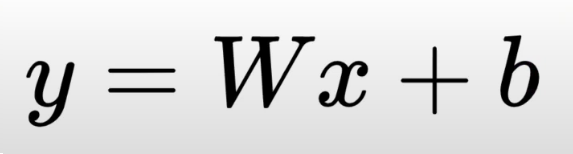
- 가중치와 편향 정의하고, 초기화함
- requries_grad=True
    - 학습가능 파라미터라고 명시하는것임

In [11]:
W = torch.zeros(1, requires_grad=True)
b = torch.zeros(1, requires_grad=True)
hypothesis = x_train * W + b

## 3. 손실함수 계산
- $cost(W, b) = \frac{1}{m} \sum\limits_{i=1}^{m} (H(x^{(i)}) - y^{(i)})^2$
- MSE 사용
- 이 떄 순전파 일어남

In [12]:
cost = torch.mean((hypothesis - y_train) ** 2)

## 4. 경사하강법
- 우선 옵티마이저를 SGD 로 설정함
- zero_grad 로 이전 스텝에 계산한 그레디언트(기울기) 를 0으로 초기화함
- backward 함수로 이번 스텝 그레디언트 계산
- step 함수로 계산된 그레디언트 사용해 파라미터 업데이트

In [13]:
optimizer = optim.SGD([W, b], lr=0.01)  

optimizer.zero_grad()  
cost.backward()  
optimizer.step()

### 전체코드
- 해당 과정을 지정 에포크만큼 반복함

In [14]:
import torch  
import torch.optim as optim

x_train = torch.FloatTensor([[1], [2], [3]])
y_train = torch.FloatTensor([[2], [4], [6]])

W = torch.zeros(1, requires_grad=True)
b = torch.zeros(1, requires_grad=True)

optimizer = optim.SGD([W, b], lr=0.01)

nb_epochs = 1000
for epoch in range(1, nb_epochs + 1):
    hypothesis = x_train * W + b
    cost = torch.mean((hypothesis - y_train) ** 2)
    optimizer.zero_grad()  
    cost.backward()  
    optimizer.step()

### 편향이 없는 선형회귀의 경우


In [2]:
import torch  
import torch.optim as optim

# 데이터  
x_train = torch.FloatTensor([[1], [2], [3]])  
y_train = torch.FloatTensor([[1], [2], [3]])  
# 모델 초기화  
W = torch.zeros(1)  
# learning rate 설정  
lr = 0.1  

nb_epochs = 10  
for epoch in range(nb_epochs + 1):  
    # H(x) 계산  
    hypothesis = x_train * W  
    
    # cost gradient 계산  
    cost = torch.mean((hypothesis - y_train) ** 2)  
    gradient = torch.sum((W * x_train - y_train) * x_train)  
    
    print('Epoch {:4d}/{} W: {:.3f}, Cost: {:.6f}'.format(  
        epoch, nb_epochs, W.item(), cost.item()  
    ))  
    
    # cost gradient로 H(x) 개선  
    W -= lr * gradient

Epoch    0/10 W: 0.000, Cost: 4.666667
Epoch    1/10 W: 1.400, Cost: 0.746666
Epoch    2/10 W: 0.840, Cost: 0.119467
Epoch    3/10 W: 1.064, Cost: 0.019115
Epoch    4/10 W: 0.974, Cost: 0.003058
Epoch    5/10 W: 1.010, Cost: 0.000489
Epoch    6/10 W: 0.996, Cost: 0.000078
Epoch    7/10 W: 1.002, Cost: 0.000013
Epoch    8/10 W: 0.999, Cost: 0.000002
Epoch    9/10 W: 1.000, Cost: 0.000000
Epoch   10/10 W: 1.000, Cost: 0.000000
